In [1]:
import pandas as pd
data = pd.DataFrame(pd.read_table("Dundee1950.tsv"))
data['place']=[string.title() for string in data['place']]
data=data.dropna()# delete Ｎan
data['title']=[string.title() for string in data['title']]
data=data.drop_duplicates(subset=['title','date','place'], keep=False)
data.head()

,place,lat,long,title,date
0,Dundee,56.4584,-2.9737,Socialist Window-Dressing,1950-01-03
1,Harriet Street,56.4717,-2.9589,Bawbee Bets Now A Penny,1950-01-03
2,Dundee,56.4584,-2.9737,Was 50 Years In Jute Industry,1950-01-03
3,Gateside,56.5870,-2.9148,Was 50 Years In Jute Industry,1950-01-03
4,Dudhope Street,56.4649,-2.9741,Was 50 Years In Jute Industry,1950-01-03


In [2]:
from collections import Counter
lst= data['title']
c = Counter(i.capitalize() for x in lst for i in x.split())
print(c.most_common(200))

[('Dundee', 1533), ('For', 1438), ('In', 1375), ('To', 1113), ('At', 841), ('And', 652), ('The', 649), ('Angus', 586), ('On', 539), ('A', 473), ('Of', 469), ('Estates', 469), ('Arbroath', 425), ('Man', 370), ('New', 356), ('Perth', 335), ('Fife', 328), ('Forfar', 327), ('Montrose', 299), ('From', 237), ('Brechin', 222), ('Show', 204), ('Church', 201), ('Is', 198), ('Prices', 189), ('May', 178), ('League', 168), ('Cup', 168), ('Wedding', 167), ('Be', 166), ('Winners', 163), ('With', 153), ('By', 152), ('Scots', 151), ('Shipping', 148), ('Was', 144), ('Will', 142), ('School', 141), ('Livestock', 129), ('Dead', 129), ('Golf', 129), ('Broughty', 126), ('Dies', 125), ('Win', 125), ('Bride', 116), ('Bus', 116), ('Draw', 114), ('Wins', 114), ('Gets', 114), ('After', 114), ('St', 113), ('More', 112), ('Years', 110), ('Courier', 110), ('Advertiser', 110), ('Two', 109), ('Sale', 108), ('His', 107), ('Home', 107), ('Movements.', 106), ('Mearns', 104), ('It', 104), ('Stock', 101), ('Angus,', 101),

In [3]:
rank=data.copy(deep=True)
rank['freq'] = rank.groupby(data['place'])['place'].transform('count')
rank=rank.sort_values("freq",ascending=False)
rank=rank.loc[rank['freq']>15]
rank.head()

,place,lat,long,title,date,freq
0,Dundee,56.4584,-2.9737,Socialist Window-Dressing,1950-01-03,2439
9907,Dundee,56.4584,-2.9737,Glasgow Stock Prices,1950-08-30,2439
9956,Dundee,56.4584,-2.9737,Effie In The Swim Again,1950-08-31,2439
2686,Dundee,56.4584,-2.9737,Glasgow Stock Prices,1950-03-08,2439
9947,Dundee,56.4584,-2.9737,Daisy Was A Heartbreak,1950-08-31,2439


In [4]:
rank2=rank.drop_duplicates(subset='place', keep='first', inplace=False)
rank2.reset_index(drop=True, inplace=True)
rank2.head()

,place,lat,long,title,date,freq
0,Dundee,56.4584,-2.9737,Socialist Window-Dressing,1950-01-03,2439
1,Arbroath,56.5623,-2.5841,Arbroath Bride For Navyman,1950-07-31,1113
2,Forfar,56.6441,-2.8890,In Firm'S London,1950-05-13,916
3,Montrose,56.7092,-2.4672,Angus Police Sports Officials,1950-04-07,760
4,Brechin,56.7322,-2.6603,Ninety-Nine To-Day,1950-03-23,677


In [5]:
dataDundee = data[data['place']=='Dundee'].copy()
dataDundee['Dundee'] = dataDundee.groupby('date')['date'].transform(len)
dataDundee = dataDundee.drop_duplicates(['date'], keep='first')
dataDundee = dataDundee.set_index(['date'])

dataArbroath = data[data['place']=='Arbroath'].copy()
dataArbroath['Arboath'] = dataArbroath.groupby('date')['date'].transform(len)
dataArbroath = dataArbroath.drop_duplicates(['date'], keep='first')
dataArbroath = dataArbroath.set_index(['date'])

dataMontrose = data[data['place']=='Montrose'].copy()
dataMontrose['Montrose'] = dataMontrose.groupby('date')['date'].transform(len)
dataMontrose = dataMontrose.drop_duplicates(['date'], keep='first')
dataMontrose = dataMontrose.set_index(['date'])

dataForfar = data[data['place']=='Forfar'].copy()
dataForfar['Forfar'] = dataForfar.groupby('date')['date'].transform(len)
dataForfar = dataForfar.drop_duplicates(['date'], keep='first')
dataForfar = dataForfar.set_index(['date'])

dataBrechin = data[data['place']=='Brechin'].copy()
dataBrechin['Brechin'] = dataBrechin.groupby('date')['date'].transform(len)
dataBrechin = dataBrechin.drop_duplicates(['date'], keep='first')
dataBrechin = dataBrechin.set_index(['date'])

dataCarnoustie = data[data['place']=='Carnoustie'].copy()
dataCarnoustie['Carnoustie'] = dataCarnoustie.groupby('date')['date'].transform(len)
dataCarnoustie = dataCarnoustie.drop_duplicates(['date'], keep='first')
dataCarnoustie = dataCarnoustie.set_index(['date'])

dataMonifieth = data[data['place']=='Monifieth'].copy()
dataMonifieth['Monifieth'] = dataMonifieth.groupby('date')['date'].transform(len)
dataMonifieth = dataMonifieth.drop_duplicates(['date'], keep='first')
dataMonifieth = dataMonifieth.set_index(['date'])

dataBroughtyFerry = data[data['place']=='Broughty Ferry'].copy()
dataBroughtyFerry['BroughtyFerry'] = dataBroughtyFerry.groupby('date')['date'].transform(len)
dataBroughtyFerry = dataBroughtyFerry.drop_duplicates(['date'], keep='first')
dataBroughtyFerry = dataBroughtyFerry.set_index(['date'])

dataKirriemuir = data[data['place']=='Kirriemuir'].copy()
dataKirriemuir['Kirriemuir'] = dataKirriemuir.groupby('date')['date'].transform(len)
dataKirriemuir = dataKirriemuir.drop_duplicates(['date'], keep='first')
dataKirriemuir = dataKirriemuir.set_index(['date'])

dataTannadice = data[data['place']=='Tannadice'].copy()
dataTannadice['Tannadice'] = dataTannadice.groupby('date')['date'].transform(len)
dataTannadice = dataTannadice.drop_duplicates(['date'], keep='first')
dataTannadice = dataTannadice.set_index(['date'])

dataEdzell = data[data['place']=='Edzell'].copy()
dataEdzell['Edzell'] = dataEdzell.groupby('date')['date'].transform(len)
dataEdzell = dataEdzell.drop_duplicates(['date'], keep='first')
dataEdzell = dataEdzell.set_index(['date'])

dataStCyrus = data[data['place']=='St Cyrus'].copy()
dataStCyrus['StCyrus'] = dataStCyrus.groupby('date')['date'].transform(len)
dataStCyrus = dataStCyrus.drop_duplicates(['date'], keep='first')
dataStCyrus = dataStCyrus.set_index(['date'])


dataCraigie = data[data['place']=='Craigie'].copy()
dataCraigie['Craigie'] = dataCraigie.groupby('date')['date'].transform(len)
dataCraigie = dataCraigie.drop_duplicates(['date'], keep='first')
dataCraigie = dataCraigie.set_index(['date'])

dataTayport = data[data['place']=='Tayport'].copy()
dataTayport['Tayport'] = dataTayport.groupby('date')['date'].transform(len)
dataTayport = dataTayport.drop_duplicates(['date'], keep='first')
dataTayport = dataTayport.set_index(['date'])


dataEastEnd = data[data['place']=='East End'].copy()
dataEastEnd['EastEnd'] = dataEastEnd.groupby('date')['date'].transform(len)
dataEastEnd = dataEastEnd.drop_duplicates(['date'], keep='first')
dataEastEnd = dataEastEnd.set_index(['date'])


dataInvergowrie = data[data['place']=='Invergowrie'].copy()
dataInvergowrie['Invergowrie'] = dataInvergowrie.groupby('date')['date'].transform(len)
dataInvergowrie = dataInvergowrie.drop_duplicates(['date'], keep='first')
dataInvergowrie = dataInvergowrie.set_index(['date'])

dataBeechwoodPark = data[data['place']=='Beechwood Park'].copy()
dataBeechwoodPark['BeechwoodPark'] = dataBeechwoodPark.groupby('date')['date'].transform(len)
dataBeechwoodPark = dataBeechwoodPark.drop_duplicates(['date'], keep='first')
dataBeechwoodPark = dataBeechwoodPark.set_index(['date'])

dataGlamis = data[data['place']=='Glamis'].copy()
dataGlamis['Glamis'] = dataGlamis.groupby('date')['date'].transform(len)
dataGlamis = dataGlamis.drop_duplicates(['date'], keep='first')
dataGlamis = dataGlamis.set_index(['date'])

dataJohnshaven = data[data['place']=='Johnshaven'].copy()
dataJohnshaven['Johnshaven'] = dataJohnshaven.groupby('date')['date'].transform(len)
dataJohnshaven = dataJohnshaven.drop_duplicates(['date'], keep='first')
dataJohnshaven = dataJohnshaven.set_index(['date'])


dataGourdon = data[data['place']=='Gourdon'].copy()
dataGourdon['Gourdon'] = dataGourdon.groupby('date')['date'].transform(len)
dataGourdon = dataGourdon.drop_duplicates(['date'], keep='first')
dataGourdon = dataGourdon.set_index(['date'])

dataStationPark = data[data['place']=='Station Park'].copy()
dataStationPark['StationPark'] = dataStationPark.groupby('date')['date'].transform(len)
dataStationPark = dataStationPark.drop_duplicates(['date'], keep='first')
dataStationPark = dataStationPark.set_index(['date'])


FreqPlace = pd.concat([dataDundee['Dundee'],dataArbroath['Arboath'],
                       dataForfar['Forfar'],dataMontrose['Montrose'],
                       dataBrechin['Brechin'],dataCarnoustie['Carnoustie'],
                       dataMonifieth['Monifieth'],dataBroughtyFerry['BroughtyFerry'],
                       dataKirriemuir['Kirriemuir'],dataTannadice['Tannadice'],
                       dataGlamis['Glamis'],dataCraigie['Craigie'],
                       dataEdzell['Edzell'],dataTayport['Tayport'],
                       dataEastEnd['EastEnd'],dataStCyrus['StCyrus'],
                       dataInvergowrie['Invergowrie'],dataStationPark['StationPark'],
                       dataGourdon['Gourdon'],dataJohnshaven['Johnshaven'],
                       dataBeechwoodPark['BeechwoodPark']
                      ], axis=1)
FreqPlace.index.names = ['date']
FreqPlace = FreqPlace.reset_index()
FreqPlace
#FreqPlace.columns.values

,date,Dundee,Arboath,Forfar,Montrose,Brechin,Carnoustie,Monifieth,BroughtyFerry,Kirriemuir,...,Craigie,Edzell,Tayport,EastEnd,StCyrus,Invergowrie,StationPark,Gourdon,Johnshaven,BeechwoodPark
0,1950-01-03,12,7.0,5.0,8.0,7.0,NaN,NaN,4.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1,1950-01-05,8,7.0,4.0,4.0,4.0,1.0,1.0,2.0,2.0,...,1.0,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1950-01-06,11,6.0,4.0,6.0,3.0,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
3,1950-01-07,10,4.0,1.0,2.0,2.0,1.0,NaN,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1950-01-09,4,6.0,3.0,7.0,4.0,1.0,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
5,1950-01-10,5,8.0,3.0,3.0,2.0,3.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,1950-01-11,26,6.0,NaN,2.0,4.0,NaN,NaN,1.0,1.0,...,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1950-01-12,10,4.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1950-01-13,3,5.0,2.0,1.0,5.0,1.0,2.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1950-01-14,13,4.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


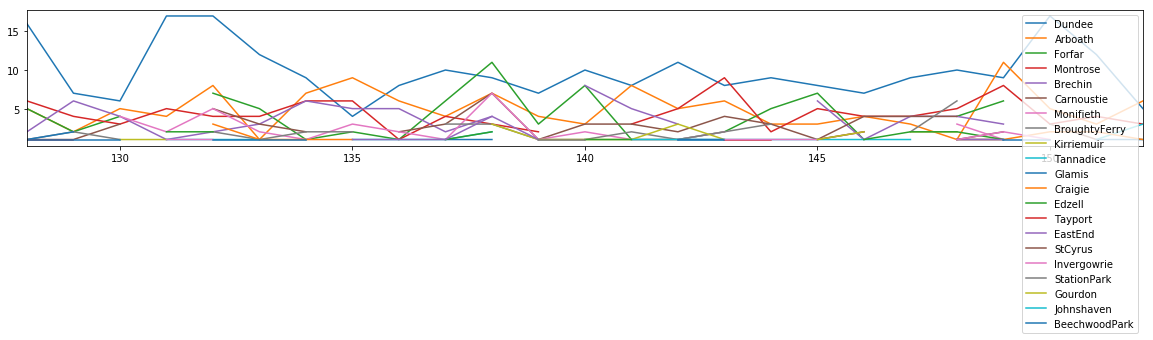

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

FreqPlace8=FreqPlace.loc[(FreqPlace['date'].str.contains('1950-08'))]
FreqPlace8
FreqPlace8.plot(figsize=(20,2.5))
plt.show()

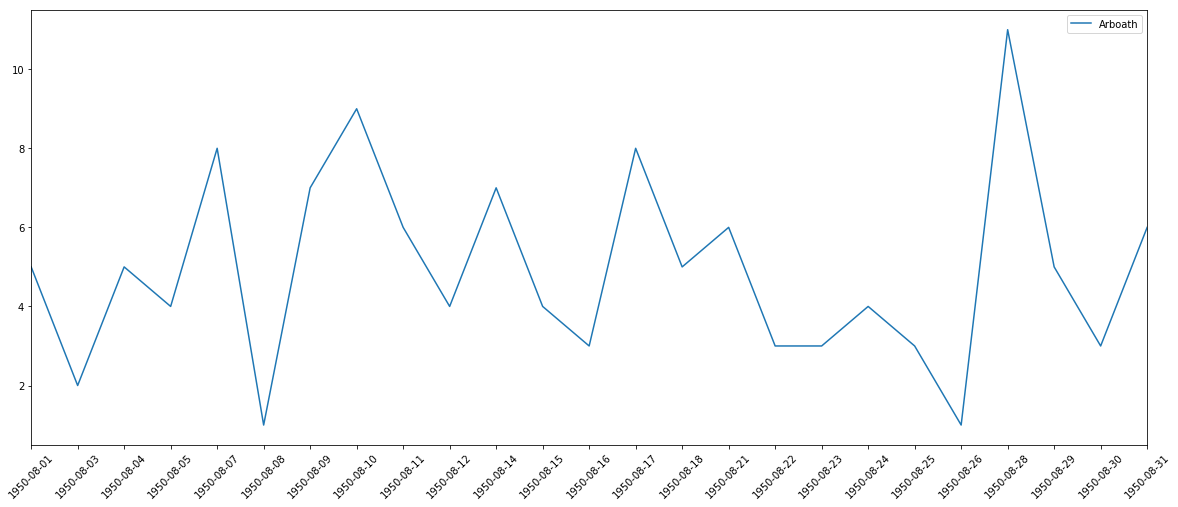

In [7]:
p = FreqPlace8.plot(y='Arboath',figsize=(20,8))
plt.xticks(FreqPlace8.index.values, FreqPlace8['date'], rotation=45)
plt.show()

In [8]:
Arbroath=data.loc[(data['place']=='Arbroath')& (data['date']=='1950-08-28')]
Arbroath=Arbroath[['place','title','date']]
Arbroath
#Lewes Runners

,place,title,date
9726,Arbroath,Guard Of Brownies For Arbroath Bride,1950-08-28
9735,Arbroath,Trophy For Best Clova Sheepdog,1950-08-28
9737,Arbroath,Mac Bailey’S Record Furlong,1950-08-28
9738,Arbroath,Janitor Hurt In School Explosion,1950-08-28
9756,Arbroath,Chop-And-Change Team Leads,1950-08-28
9763,Arbroath,Another Title For R.D. Mills,1950-08-28
9774,Arbroath,The Score-Board,1950-08-28
9780,Arbroath,Dundee Masonic Kink’S Success,1950-08-28
9794,Arbroath,Lewes Runners,1950-08-28
9795,Arbroath,How They Stand,1950-08-28


In [9]:
data.loc[(data['place']=='Arbroath')& (data['date']=='1950-08-10')]
#16,000 Hands To Help The Harvest

,place,lat,long,title,date
8795,Arbroath,56.5623,-2.5841,Back To Days Of Bruce,1950-08-10
8803,Arbroath,56.5623,-2.5841,Seeded Pair Go Down,1950-08-10
8814,Arbroath,56.5623,-2.5841,Stirling Show And Sale,1950-08-10
8821,Arbroath,56.5623,-2.5841,"16,000 Hands To Help The Harvest",1950-08-10
8827,Arbroath,56.5623,-2.5841,Wind Spoils Play,1950-08-10
8831,Arbroath,56.5623,-2.5841,Vics Go Nap,1950-08-10
8839,Arbroath,56.5623,-2.5841,No Change Is Hibs' Slogan,1950-08-10
8842,Arbroath,56.5623,-2.5841,Arnot Shock Stobbie,1950-08-10
8849,Arbroath,56.5623,-2.5841,Junior Cup-Fighters Are Off,1950-08-10


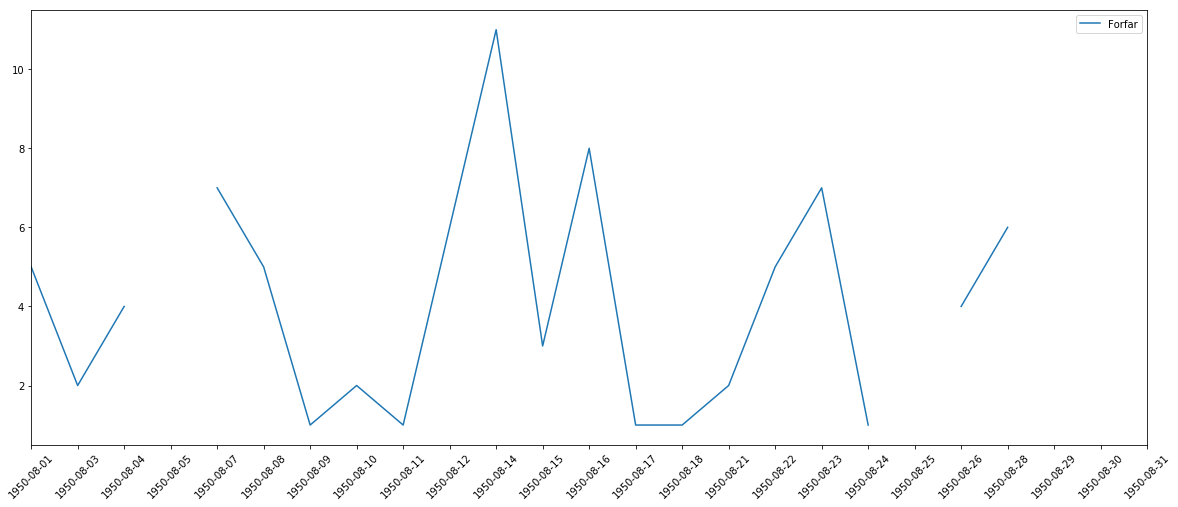

In [10]:
p = FreqPlace8.plot(y='Forfar',figsize=(20,8))
plt.xticks(FreqPlace8.index.values, FreqPlace8['date'], rotation=45)
plt.show()

In [11]:
Forfar=data.loc[(data['place']=='Forfar')&(data['date']=='1950-08-14')]
Forfar
#Scotland'S Civic Splendour
#Tannadice – Oathlaw Show Winners

,place,lat,long,title,date
8975,Forfar,56.6441,-2.889,Scotland'S Civic Splendour,1950-08-14
8991,Forfar,56.6441,-2.889,Legion Players Compete At Alyth,1950-08-14
8995,Forfar,56.6441,-2.889,Tannadice – Oathlaw Show Winners,1950-08-14
9014,Forfar,56.6441,-2.889,Angus Farmer Dies Of Injuries,1950-08-14
9028,Forfar,56.6441,-2.889,"His ""Eden"" Double",1950-08-14
9037,Forfar,56.6441,-2.889,Title In Sight At Forthill,1950-08-14
9047,Forfar,56.6441,-2.889,Gayfield Headache,1950-08-14
9049,Forfar,56.6441,-2.889,1950-51'S First Day,1950-08-14
9052,Forfar,56.6441,-2.889,"No ""Fire"" In The Dens Attack",1950-08-14
9057,Forfar,56.6441,-2.889,No Fife Joy At Parkhead,1950-08-14


In [12]:
data.loc[(data['place']=='Forfar')&(data['date']=='1950-08-23')]
#Champions To Meet At Forfar

,place,lat,long,title,date
9469,Forfar,56.6441,-2.889,Funeral Of Mr George T. Watson,1950-08-23
9476,Forfar,56.6441,-2.889,Matrix Lose Lead,1950-08-23
9507,Forfar,56.6441,-2.889,Public To See Airlie Castle Gardens,1950-08-23
9516,Forfar,56.6441,-2.889,Dens Bid Is Record For Scots Club,1950-08-23
9524,Forfar,56.6441,-2.889,Champions To Meet At Forfar,1950-08-23
9526,Forfar,56.6441,-2.889,School Date For Tattie Lifting,1950-08-23
9529,Forfar,56.6441,-2.889,Damages Awarded Against Boxer,1950-08-23


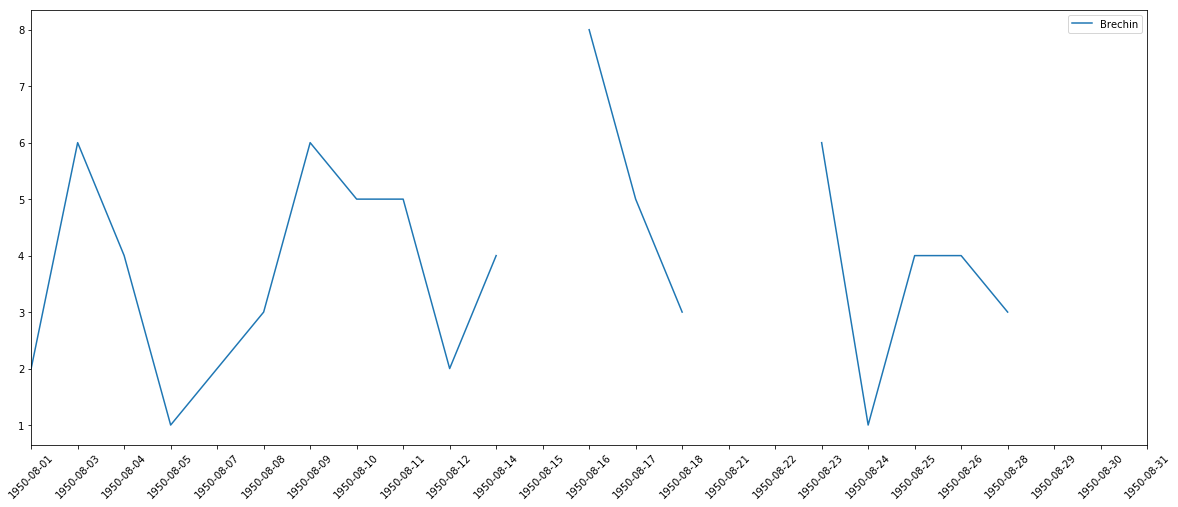

In [13]:
p = FreqPlace8.plot(y='Brechin',figsize=(20,8))
plt.xticks(FreqPlace8.index.values, FreqPlace8['date'], rotation=45)
plt.show()

In [14]:
Brechin=data.loc[(data['place']=='Brechin')& (data['date']=='1950-08-16')]
Brechin
#Dundee Police Lose Bowling Final
#Harvest Fuel Bill Jumps

,place,lat,long,title,date
9133,Brechin,56.7322,-2.6603,Brechin Riled At Grading Complaint,1950-08-16
9136,Brechin,56.7322,-2.6603,Brechin Vics Go Nap,1950-08-16
9153,Brechin,56.7322,-2.6603,Livestock Prices Dundee.,1950-08-16
9160,Brechin,56.7322,-2.6603,Dundee Police Lose Bowling Final,1950-08-16
9162,Brechin,56.7322,-2.6603,Big County In Benefit Match,1950-08-16
9171,Brechin,56.7322,-2.6603,To-Night'S Card And Refs,1950-08-16
9177,Brechin,56.7322,-2.6603,Hibs Hit St Mirren,1950-08-16
9180,Brechin,56.7322,-2.6603,Harvest Fuel Bill Jumps,1950-08-16


In [15]:
Brechin.to_csv('Brechin.csv')

In [16]:
data.loc[(data['place']=='Brechin')& (data['date']=='1950-08-09')]
#Midlands Player Beaten
#Homing

,place,lat,long,title,date
8709,Brechin,56.7322,-2.6603,Midlands Player Beaten,1950-08-09
8710,Brechin,56.7322,-2.6603,Earl'S Xi. At Brechin,1950-08-09
8719,Brechin,56.7322,-2.6603,Homing,1950-08-09
8764,Brechin,56.7322,-2.6603,Livestock Prices Dundee.,1950-08-09
8768,Brechin,56.7322,-2.6603,Try-Gut For Pro. At Montrose,1950-08-09
8769,Brechin,56.7322,-2.6603,Harnett Out Of Forthill Side,1950-08-09


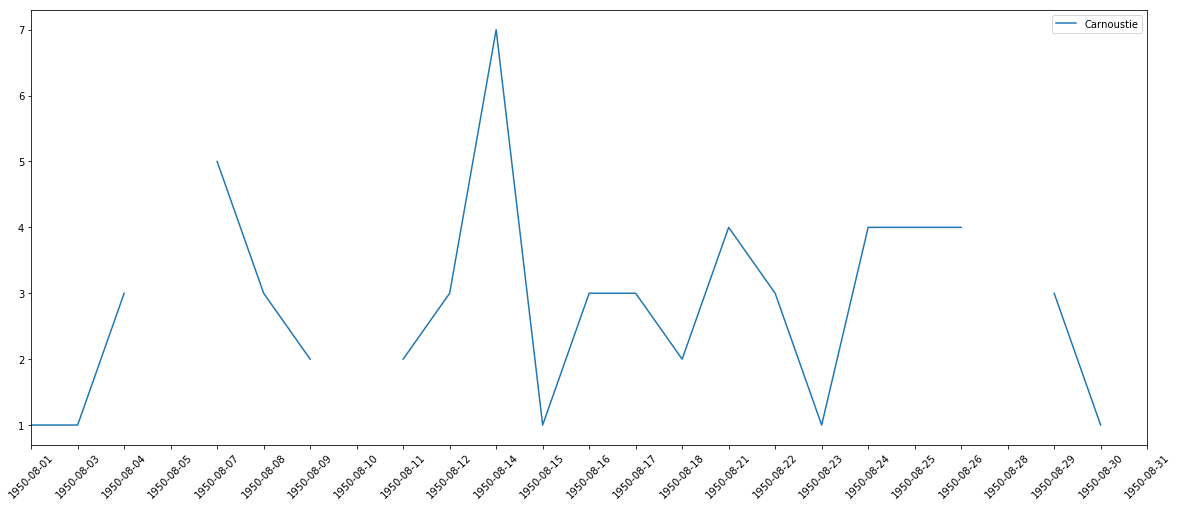

In [17]:
p = FreqPlace8.plot(y='Carnoustie',figsize=(20,8))
plt.xticks(FreqPlace8.index.values, FreqPlace8['date'], rotation=45)
plt.show()

In [18]:
Carnoustie=data.loc[(data['place']=='Carnoustie')& (data['date']=='1950-08-14')]
Carnoustie=Carnoustie[['place','title','date']]
Carnoustie
#Curtis Cup Players End All-Square
#Scotland'S Civic Splendour

,place,title,date
8977,Carnoustie,Scotland'S Civic Splendour,1950-08-14
8989,Carnoustie,Hard Court Titles At St Andrews,1950-08-14
9019,Carnoustie,Angling.,1950-08-14
9025,Carnoustie,Curtis Cup Players End All-Square,1950-08-14
9029,Carnoustie,"His ""Eden"" Double",1950-08-14
9040,Carnoustie,Cup-Tie Shadows Worry Juniors,1950-08-14
9068,Carnoustie,Child Rider Hurt At Gymkhana,1950-08-14


In [19]:
Carnoustie.to_csv('Carnoustie.csv')

In [20]:
Carnoustie=data.loc[(data['place']=='Carnoustie')& (data['date']=='1950-08-07')]

#County Cup Pairings
#Golf

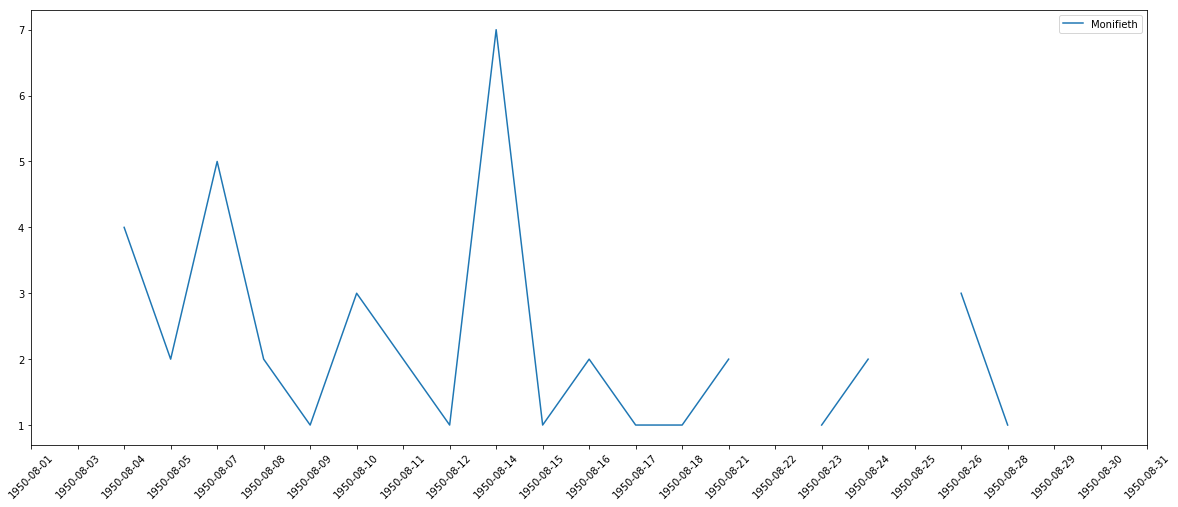

In [21]:
p = FreqPlace8.plot(y='Monifieth',figsize=(20,8))
plt.xticks(FreqPlace8.index.values, FreqPlace8['date'], rotation=45)
plt.show()

In [22]:
Monifieth=data.loc[(data['place']=='Monifieth')& (data['date']=='1950-08-14')]
Monifieth=Monifieth[['place','title','date']]
Monifieth
#Scotland'S Civic Splendour 重複
#Thistle Harriers' Record-Breaker
#Angling

,place,title,date
8979,Monifieth,Scotland'S Civic Splendour,1950-08-14
8992,Monifieth,Thistle Harriers' Record-Breaker,1950-08-14
9012,Monifieth,Golfers' Scores Rejected,1950-08-14
9018,Monifieth,Angling.,1950-08-14
9027,Monifieth,"His ""Eden"" Double",1950-08-14
9042,Monifieth,Cup-Tie Shadows Worry Juniors,1950-08-14
9062,Monifieth,Wedding Of Teacher From Monifieth,1950-08-14


In [23]:
Monifieth.to_csv('Monifieth.csv')

In [24]:
data.loc[(data['place']=='Monifieth')& (data['date']=='1950-08-07')]
#Star Golfers To Play At Pitlochry


,place,lat,long,title,date
8534,Monifieth,56.4831,-2.8161,Fife Man'S Treble At Strathallan,1950-08-07
8584,Monifieth,56.4831,-2.8161,Angling.,1950-08-07
8592,Monifieth,56.4831,-2.8161,Round-The-Clock Golf,1950-08-07
8603,Monifieth,56.4831,-2.8161,Star Golfers To Play At Pitlochry,1950-08-07
8615,Monifieth,56.4831,-2.8161,County Cup Pairings,1950-08-07


In [17]:
sport=rank[(rank['title'].str.contains('Golf')) |(rank['title'].str.contains('Rugby')) | 
           (rank['title'].str.contains('Hockey')) |(rank['title'].str.contains('Bowling')) | 
(rank['title'].str.contains('Putter')) | (rank['title'].str.contains('Soccer')) | 
(rank['title'].str.contains('Runner')) | (rank['title'].str.contains('Ten-A-Side At Forfar')) |
(rank['title'].str.contains('Ex-Loon For Southampton')) | (rank['title'].str.contains('Curling'))| 
(rank['title'].str.contains('Football')) |
(rank['title'].str.contains('Scotland Xv. Packs Scoring Punch')) |
(rank['title'].str.contains('Swimmers')) | 
(rank['title'].str.contains('Boxers')) | (rank['title'].str.contains('Cricketer')) |
(rank['title'].str.contains('Skating')) | (rank['title'].str.contains('Cricket')) |
(rank['title'].str.contains('Bowlers')) | (rank['title'].str.contains('Badminton')) |
(rank['title'].str.contains("King'S Teams")) | (rank['title'].str.contains('Badminton')) | 
(rank['title'].str.contains('Tennis'))|(rank['title'].str.contains('Motor Cycle Race'))
]
sport=sport[['place','title','date']]
sport=sport.loc[sport['date'].str.contains('1950-08')]
sport8=sport.loc[(sport['place']=='Dundee')|(sport['place']=='Arboath')|(sport['place']=='Forfar')|
(sport['place']=='Montrose')|(sport['place']=='Brechin')|(sport['place']=='Carnoustie')|
(sport['place']=='Monifieth')|(sport['place']=='BroughtyFerry')|(sport['place']=='Kirriemuir')|
(sport['place']=='Tannadice')|(sport['place']=='Glamis')|(sport['place']=='Craigie')|
(sport['place']=='Edzell')|(sport['place']=='Tayport')|(sport['place']=='EastEnd')|
(sport['place']=='StCyrus')|(sport['place']=='Invergowrie')|(sport['place']=='StationPark')|
(sport['place']=='Gourdon')|(sport['place']=='Johnshaven')|(sport['place']=='BeechwoodPark')
]
sport8
#Arboat沒有出現
#sport.loc[(sport['place'].str.contains('Dundee'))|(sport['place'].str.contains('Arboath'))]
#'Dundee','Arboath','Forfar','Montrose','Brechin','Carnoustie',
#'Monifieth','BroughtyFerry','Kirriemuir','Tannadice','Glamis','Craigie',
#'Edzell','Tayport','EastEnd','StCyrus','Invergowrie','StationPark',
#'Gourdon','Johnshaven','BeechwoodPark'
#sport

,place,title,date
9662,Dundee,Harris Rugby Club To Play On,1950-08-26
9791,Dundee,Irish Boy Is Golf Champion,1950-08-28
8604,Dundee,Star Golfers To Play At Pitlochry,1950-08-07
8591,Dundee,Round-The-Clock Golf,1950-08-07
9511,Dundee,Boy Golfers Play In Thunderstorm,1950-08-23
9603,Dundee,Morgan F.P. Rugby Club Officials,1950-08-25
9159,Dundee,Dundee Police Lose Bowling Final,1950-08-16
8424,Dundee,Arbroath Boy Golfer In Final,1950-08-04
8423,Forfar,Arbroath Boy Golfer In Final,1950-08-04
9414,Forfar,Bowling,1950-08-22


In [24]:
data8=sport.loc[(data['place']=='Dundee')|(data['place']=='Arboath')|(data['place']=='Forfar')|
(data['place']=='Montrose')|(data['place']=='Brechin')|(data['place']=='Carnoustie')|
(data['place']=='Monifieth')|(data['place']=='BroughtyFerry')|(data['place']=='Kirriemuir')|
(data['place']=='Tannadice')|(data['place']=='Glamis')|(data['place']=='Craigie')|
(data['place']=='Edzell')|(data['place']=='Tayport')|(data['place']=='EastEnd')|
(data['place']=='StCyrus')|(data['place']=='Invergowrie')|(data['place']=='StationPark')|
(data['place']=='Gourdon')|(data['place']=='Johnshaven')|(data['place']=='BeechwoodPark')
]
data8=data8.loc[data8['date'].str.contains('1950-08')]
data8.head()

,place,title,date
9662,Dundee,Harris Rugby Club To Play On,1950-08-26
9791,Dundee,Irish Boy Is Golf Champion,1950-08-28
9800,Dundee,Was The Referee Too Hasty?,1950-08-28
9038,Dundee,Cup-Tie Shadows Worry Juniors,1950-08-14
9026,Dundee,Curtis Cup Players End All-Square,1950-08-14
